# Análise Explotória - Conjuntos de Dados Kaggle

In [1]:
from pandas import read_csv, DataFrame, concat
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = read_csv('01-dados/autos.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [4]:
data.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

In [5]:
# Como a quantidade de dados nulos é menor que 5% dos dados eles serão apagados
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
yearOfCreation         0
yearCrawled            0
monthOfCreation        0
monthCrawled           0
NoOfDaysOnline         0
NoOfHrsOnline          0
yearsOld               0
monthsOld              0
dtype: int64

In [7]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


## Distribuição dos Veículos por Ano de Registro

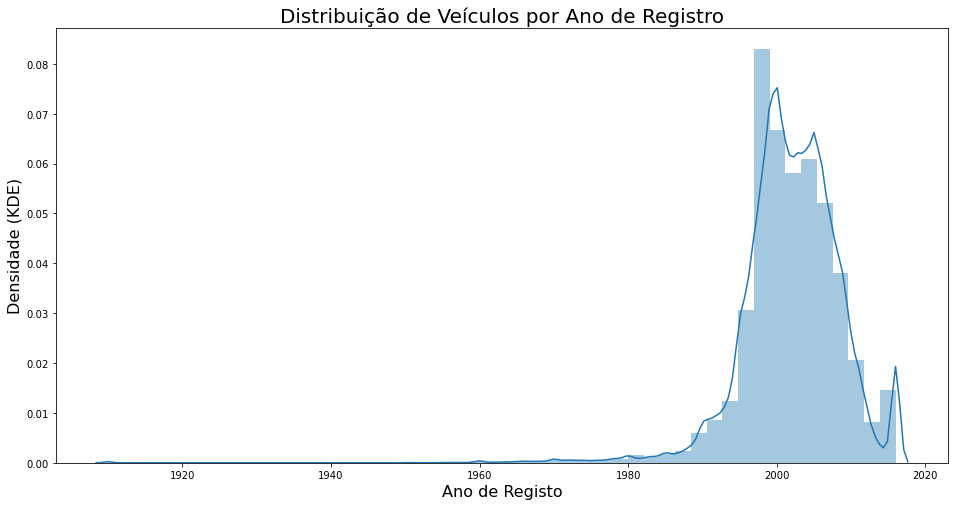

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(data['yearOfRegistration'],kde=True,ax=ax)
ax.set_title('Distribuição de Veículos por Ano de Registro',fontsize=20)
plt.ylabel('Densidade (KDE)', fontsize=16)
plt.xlabel('Ano de Registo', fontsize=16)
plt.show()

## Faixa de Preço Pelo Tipo de Veículo

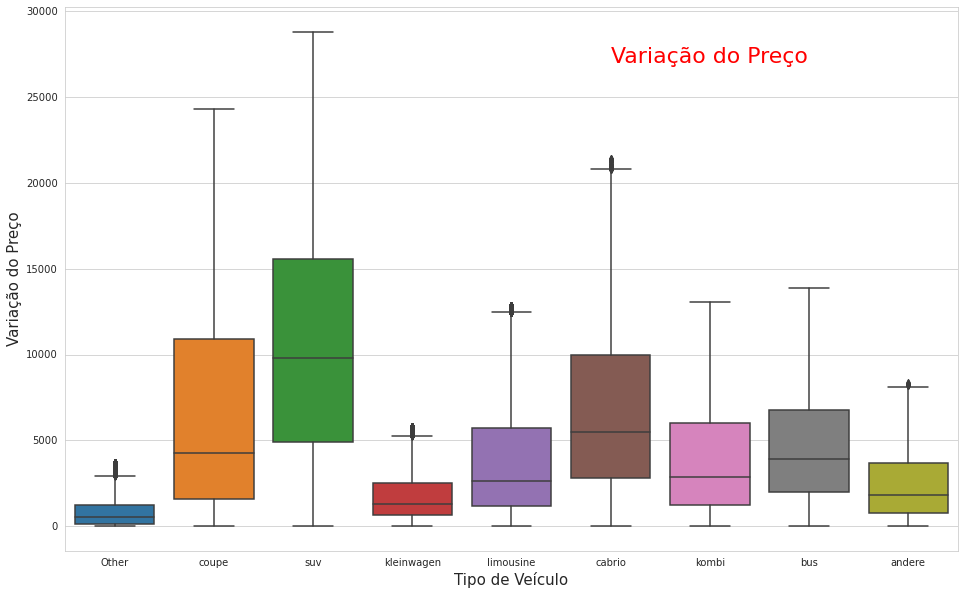

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x='vehicleType', y='price', data=data)
ax.text(5,27000,'Variação do Preço',fontsize=22,color='r')
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':15})
ax.yaxis.set_label_text('Variação do Preço', fontdict={'size':15})
plt.show()

## Contagem Total de Veículos à Vendas Pelo Tipo de Veículo

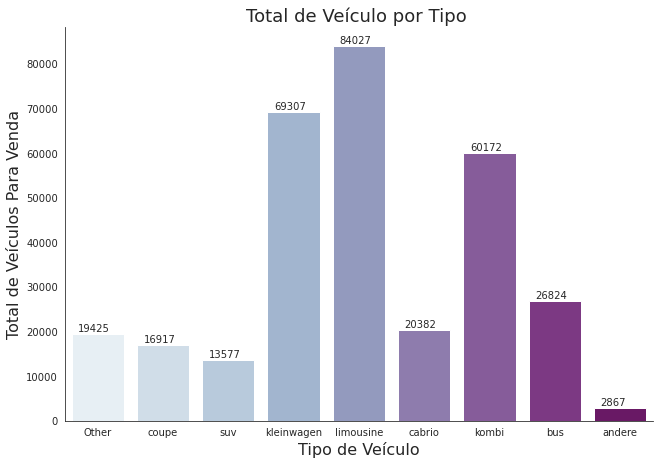

In [10]:
sns.set_style("white")
g = sns.factorplot(x="vehicleType", data=data, kind="count", palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Total de Veículo por Tipo ",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

## Vepículo por Marca

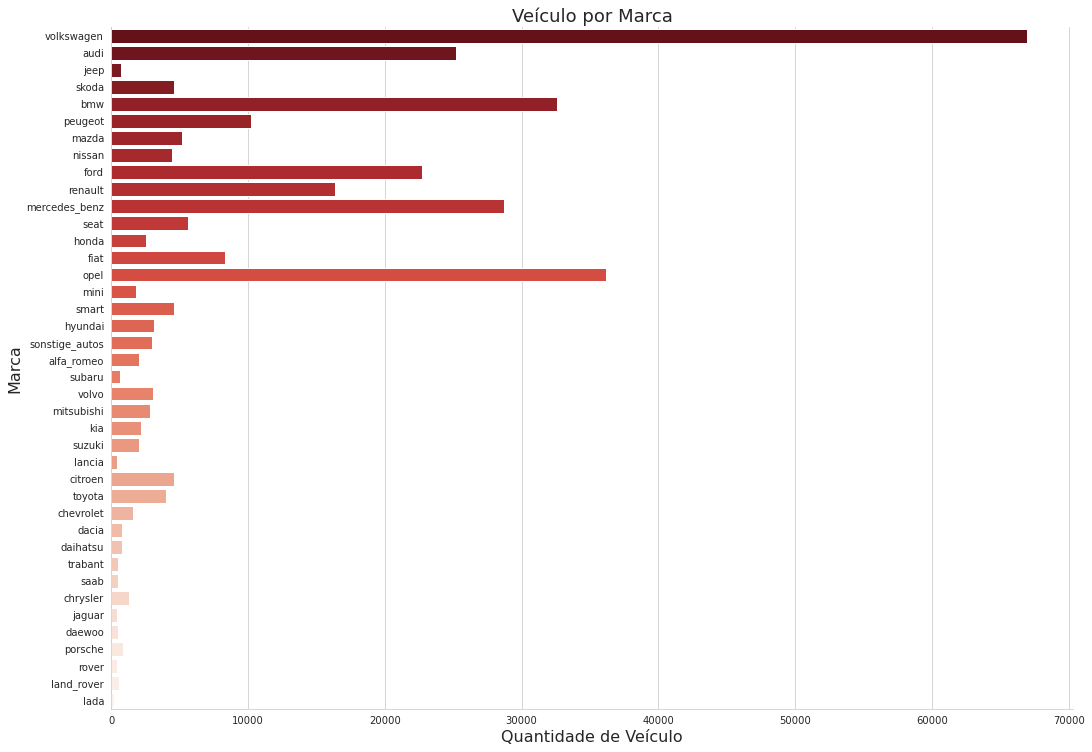

In [11]:
sns.set_style('whitegrid')
p = sns.factorplot(y='brand', data=data, kind='count', palette='Reds_r', size=10, aspect=1.5)
p.ax.set_title('Veículo por Marca', fontdict={'size':18})
p.ax.xaxis.set_label_text('Quantidade de Veículo', fontdict={'size':16})
p.ax.yaxis.set_label_text('Marca', fontdict={'size':16})
plt.show()

## Preço Médio dos Veículos por Tipo e Câmbio

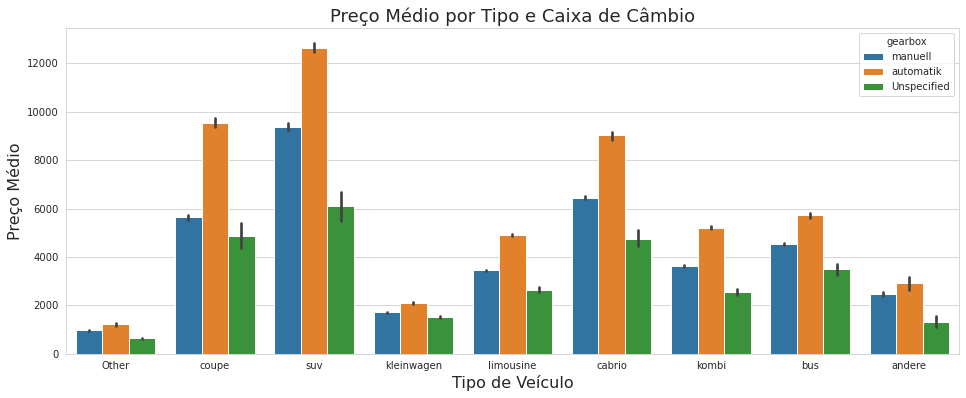

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='vehicleType', y='price', hue='gearbox', data=data)
ax.set_title('Preço Médio por Tipo e Caixa de Câmbio', fontdict={'size':18})
ax.xaxis.set_label_text('Tipo de Veículo', fontdict={'size':16})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size':16})
plt.show()

## Preço Médio por Tipo de Combustível e Câmbio

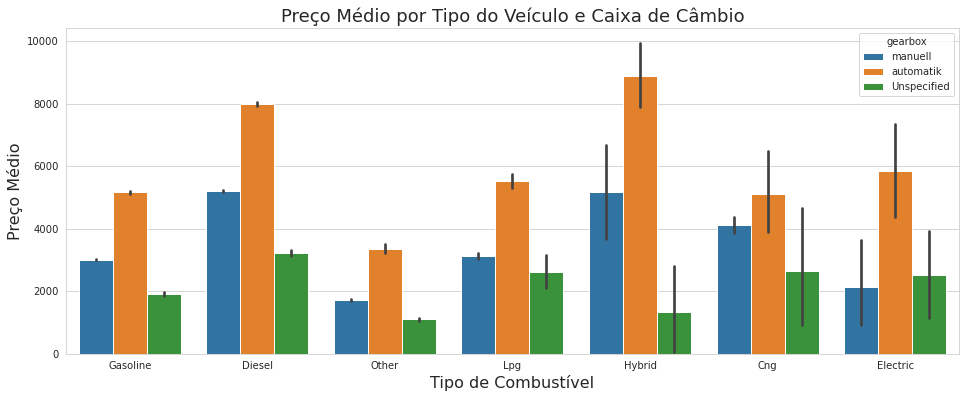

In [13]:
fig, ax=plt.subplots(figsize=(16,6))
sns.barplot(x='fuelType', y='price',hue='gearbox', data=data)
ax.set_title('Preço Médio por Tipo do Veículo e Caixa de Câmbio', fontdict={'size':18})
ax.xaxis.set_label_text('Tipo de Combustível', fontdict={'size':16})
ax.yaxis.set_label_text('Preço Médio', fontdict={'size':16})
plt.show()

## Potência Média por Tipo e Caixa de Câmbio

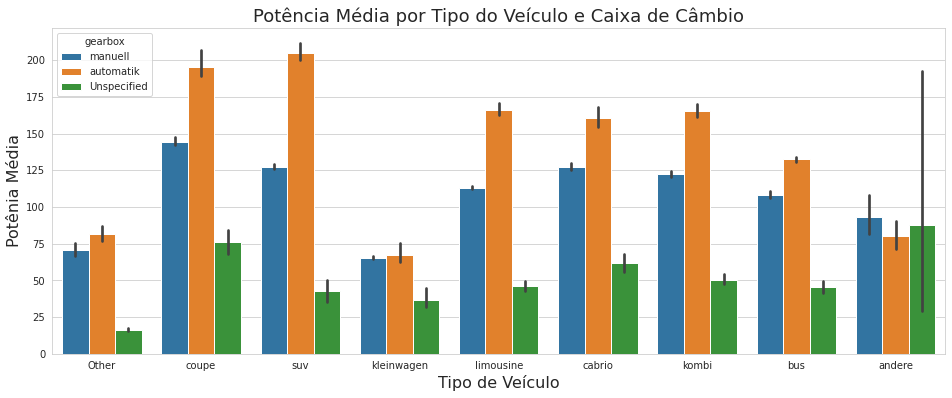

In [14]:
fig, ax=plt.subplots(figsize=(16,6))
sns.barplot(x='vehicleType', y='powerPS', hue='gearbox', data=data)
ax.set_title('Potência Média por Tipo do Veículo e Caixa de Câmbio',fontdict={'size':18})
ax.xaxis.set_label_text('Tipo de Veículo',fontdict={'size':16})
ax.yaxis.set_label_text('Potênia Média', fontdict={'size':16})
plt.show()